In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Zomato data .csv')
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [3]:
def handlerate(value):
  value=value.split('/')
  value=value[0]
  return float(value)


In [6]:
df['rate']=df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [34]:
df_maxvotes=df['votes'].max()
df_maxvotesname=df['name'][df['votes']==df_maxvotes]
df_maxvotesname

,name
38,Empire Restaurant


<Axes: xlabel='listed_in(type)', ylabel='votes'>

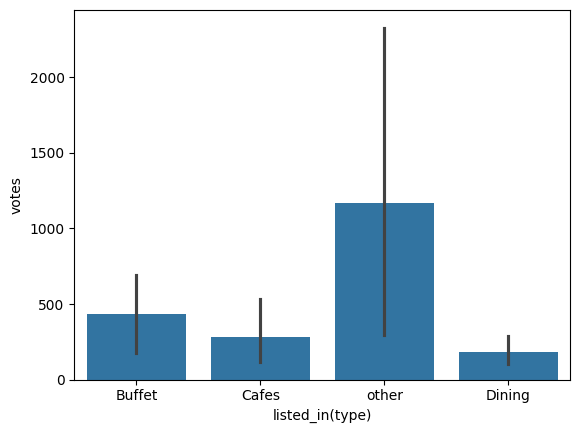

In [36]:
sns.barplot(x=df['listed_in(type)'],y=df['votes'],data=df)

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

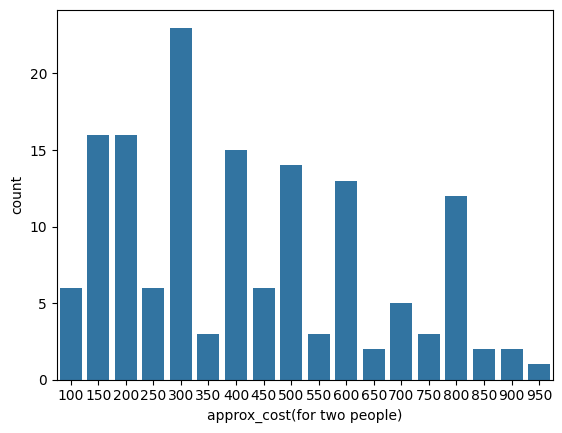

In [12]:
sns.countplot(x=df['approx_cost(for two people)'])

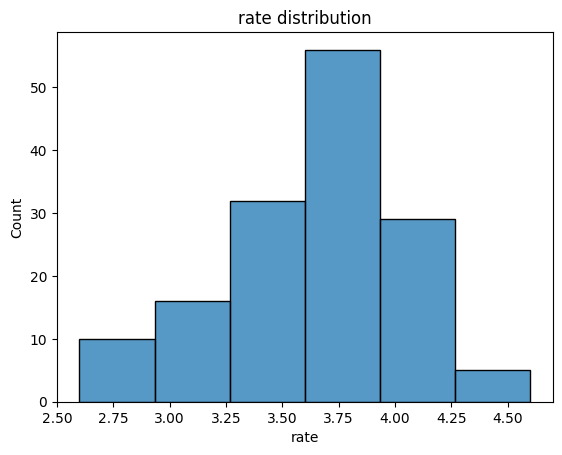

In [15]:
sns.histplot(df['rate'],bins=6)
plt.title('rate distribution')
plt.show()

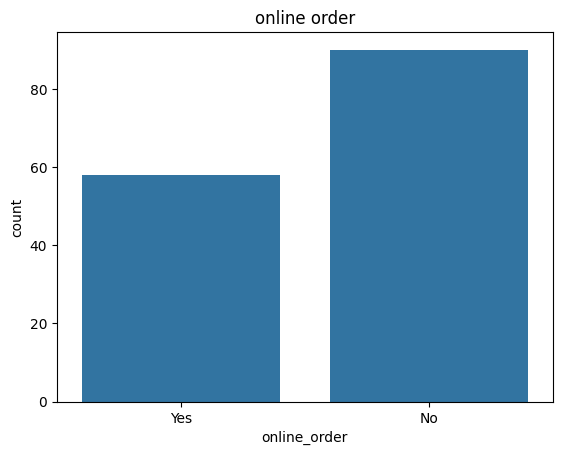

In [16]:
sns.countplot(x=df['online_order'])
plt.title('online order')
plt.show()

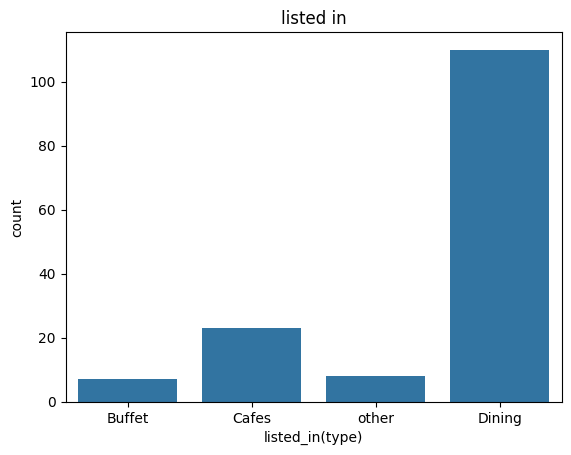

In [20]:
listed_df=df['listed_in(type)']
sns.countplot(x=listed_df)
plt.title('listed in')
plt.show()

In [24]:
df_group=df.groupby('listed_in(type)')['votes'].sum()
df_res=pd.DataFrame({'votes':df_group})
df_res.head()

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


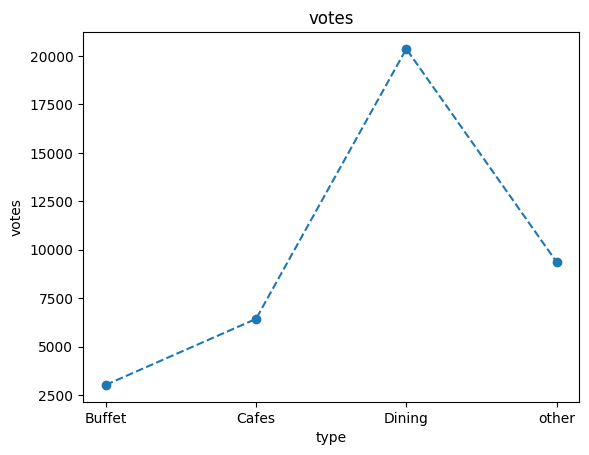

In [25]:
plt.plot(df_res,marker='o',linestyle='--')
plt.xlabel('type')
plt.ylabel('votes')
plt.title('votes')
plt.show()

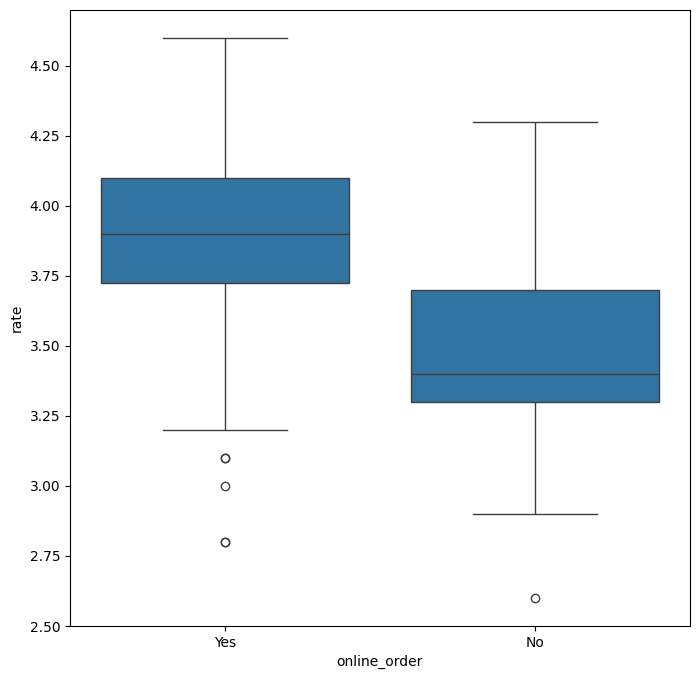

In [28]:
plt.figure(figsize=(8,8))
sns.boxplot(x='online_order',y='rate',data=df)
plt.show()

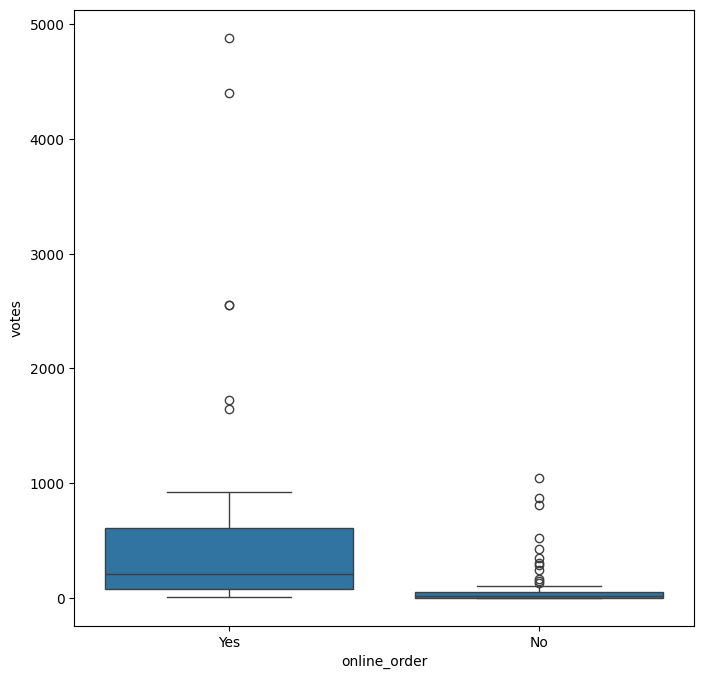

In [29]:
plt.figure(figsize=(8,8))
sns.boxplot(x='online_order',y='votes',data=df)
plt.show()

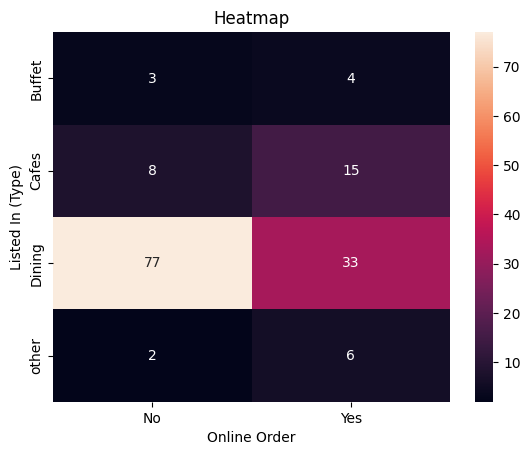

In [33]:
df_pivot = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(df_pivot, annot=True, fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()
